In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
from sklearn import metrics as mtr

from IPython.display import Image as img
import subprocess

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.4f}'.format        

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [74]:
df = pd.read_csv('credit.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [75]:
df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [76]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [77]:
df[df == 0].count()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [78]:
df.nunique()

checking_balance          4
months_loan_duration     33
credit_history            5
purpose                   6
amount                  921
savings_balance           5
employment_duration       5
percent_of_income         4
years_at_residence        4
age                      53
other_credit              3
housing                   3
existing_loans_count      4
job                       4
dependents                2
phone                     2
default                   2
dtype: int64

In [79]:
for col in df.columns:
    if (df[col].nunique() < 10):
        print(col," : ",df[col].unique())

checking_balance  :  ['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
credit_history  :  ['critical' 'good' 'poor' 'perfect' 'very good']
purpose  :  ['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']
savings_balance  :  ['unknown' '< 100 DM' '500 - 1000 DM' '> 1000 DM' '100 - 500 DM']
employment_duration  :  ['> 7 years' '1 - 4 years' '4 - 7 years' 'unemployed' '< 1 year']
percent_of_income  :  [4 2 3 1]
years_at_residence  :  [4 2 3 1]
other_credit  :  ['none' 'bank' 'store']
housing  :  ['own' 'other' 'rent']
existing_loans_count  :  [2 1 3 4]
job  :  ['skilled' 'unskilled' 'management' 'unemployed']
dependents  :  [1 2]
phone  :  ['yes' 'no']
default  :  ['no' 'yes']


In [80]:
df.drop(df[df.checking_balance == 'unknown'].index,axis=0,inplace=True)
df.drop(df[df.savings_balance == 'unknown'].index,axis=0,inplace=True)


In [81]:
replaceStruct = {
    'checking_balance':{'< 0 DM':1, '1 - 200 DM':2, '> 200 DM':3},
    'credit_history':{'critical':1, 'poor':2, 'good':3, 'very good':4,'perfect':5},
    'savings_balance':{'< 100 DM':1,'100 - 500 DM':2, '500 - 1000 DM':3, '> 1000 DM':4 },
    'employment_duration':{'unemployed':0, '< 1 year':1, '1 - 4 years':2, '4 - 7 years':3, '> 7 years':4 },
    'job':{ 'unemployed':0, 'unskilled':1,'skilled':2, 'management':3},
    'phone':{'no':0,'yes':1},
    'default':{'no':0,'yes':1}
}

In [82]:
df.replace(replaceStruct, inplace=True)

for col in df.columns:
    if (df[col].nunique() < 10):
        df[col] = df[col].astype('category')

df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
1,2,48,3,furniture/appliances,5951,1,2,2,2,22,none,own,1,2,1,0,1
3,1,42,3,furniture/appliances,7882,1,3,2,4,45,none,other,1,2,2,0,0
4,1,24,2,car,4870,1,2,3,4,53,none,other,2,2,2,0,1
7,2,36,3,car,6948,1,2,2,2,35,none,rent,1,3,1,1,0
9,2,30,1,car,5234,1,0,4,2,28,none,own,2,3,1,0,1
10,2,12,3,car,1295,1,1,3,1,25,none,rent,1,2,1,0,1
11,1,48,3,business,4308,1,1,3,4,24,none,rent,1,2,1,0,1
12,2,12,3,furniture/appliances,1567,1,2,1,1,22,none,own,1,2,1,1,0
13,1,24,1,car,1199,1,4,4,4,60,none,own,2,1,1,0,1
14,1,15,3,car,1403,1,2,2,4,28,none,rent,1,2,1,0,0


In [83]:
# for col in df.columns:
#     if (df[col].nunique() < 10):
#         print(df[col].value_counts(),"\n")
       
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 17 columns):
checking_balance        522 non-null category
months_loan_duration    522 non-null int64
credit_history          522 non-null category
purpose                 522 non-null category
amount                  522 non-null int64
savings_balance         522 non-null category
employment_duration     522 non-null category
percent_of_income       522 non-null category
years_at_residence      522 non-null category
age                     522 non-null int64
other_credit            522 non-null category
housing                 522 non-null category
existing_loans_count    522 non-null category
job                     522 non-null category
dependents              522 non-null category
phone                   522 non-null category
default                 522 non-null category
dtypes: category(14), int64(3)
memory usage: 25.6 KB


In [84]:
df1 = df.drop(['purpose','housing'],axis=1).copy()

In [85]:
df1 = pd.get_dummies(df1,columns=['other_credit'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 17 columns):
checking_balance        522 non-null category
months_loan_duration    522 non-null int64
credit_history          522 non-null category
amount                  522 non-null int64
savings_balance         522 non-null category
employment_duration     522 non-null category
percent_of_income       522 non-null category
years_at_residence      522 non-null category
age                     522 non-null int64
existing_loans_count    522 non-null category
job                     522 non-null category
dependents              522 non-null category
phone                   522 non-null category
default                 522 non-null category
other_credit_bank       522 non-null uint8
other_credit_none       522 non-null uint8
other_credit_store      522 non-null uint8
dtypes: category(11), int64(3), uint8(3)
memory usage: 25.2 KB


In [86]:
df1.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,job,dependents,phone,default,other_credit_bank,other_credit_none,other_credit_store
1,2,48,3,5951,1,2,2,2,22,1,2,1,0,1,0,1,0
3,1,42,3,7882,1,3,2,4,45,1,2,2,0,0,0,1,0
4,1,24,2,4870,1,2,3,4,53,2,2,2,0,1,0,1,0
7,2,36,3,6948,1,2,2,2,35,1,3,1,1,0,0,1,0
9,2,30,1,5234,1,0,4,2,28,2,3,1,0,1,0,1,0
10,2,12,3,1295,1,1,3,1,25,1,2,1,0,1,0,1,0
11,1,48,3,4308,1,1,3,4,24,1,2,1,0,1,0,1,0
12,2,12,3,1567,1,2,1,1,22,1,2,1,1,0,0,1,0
13,1,24,1,1199,1,4,4,4,60,2,1,1,0,1,0,1,0
14,1,15,3,1403,1,2,2,4,28,1,2,1,0,0,0,1,0


In [87]:
dfy = df1.default.copy()
dfX = df1.drop('default',axis=1).copy()

dfX_train, dfX_test, dfy_train,dfy_test = tts(dfX,dfy,test_size=0.3,random_state=600)

In [88]:
dfy_test.value_counts(normalize=True)*100

0   54.7771
1   45.2229
Name: default, dtype: float64

In [89]:
dtree = dtc(criterion='gini',random_state=600)
dtree.fit(dfX_train,dfy_train)
print(dtree.score(dfX_train,dfy_train))
print(dtree.score(dfX_test,dfy_test))

1.0
0.6560509554140127


In [90]:
char_labels = ['N','Y']
dtree_file = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dtree, out_file=dtree_file, feature_names=list(dfX_train), class_names=list(char_labels),
                               label='all', filled=True, rounded=True )
dtree_file.close()

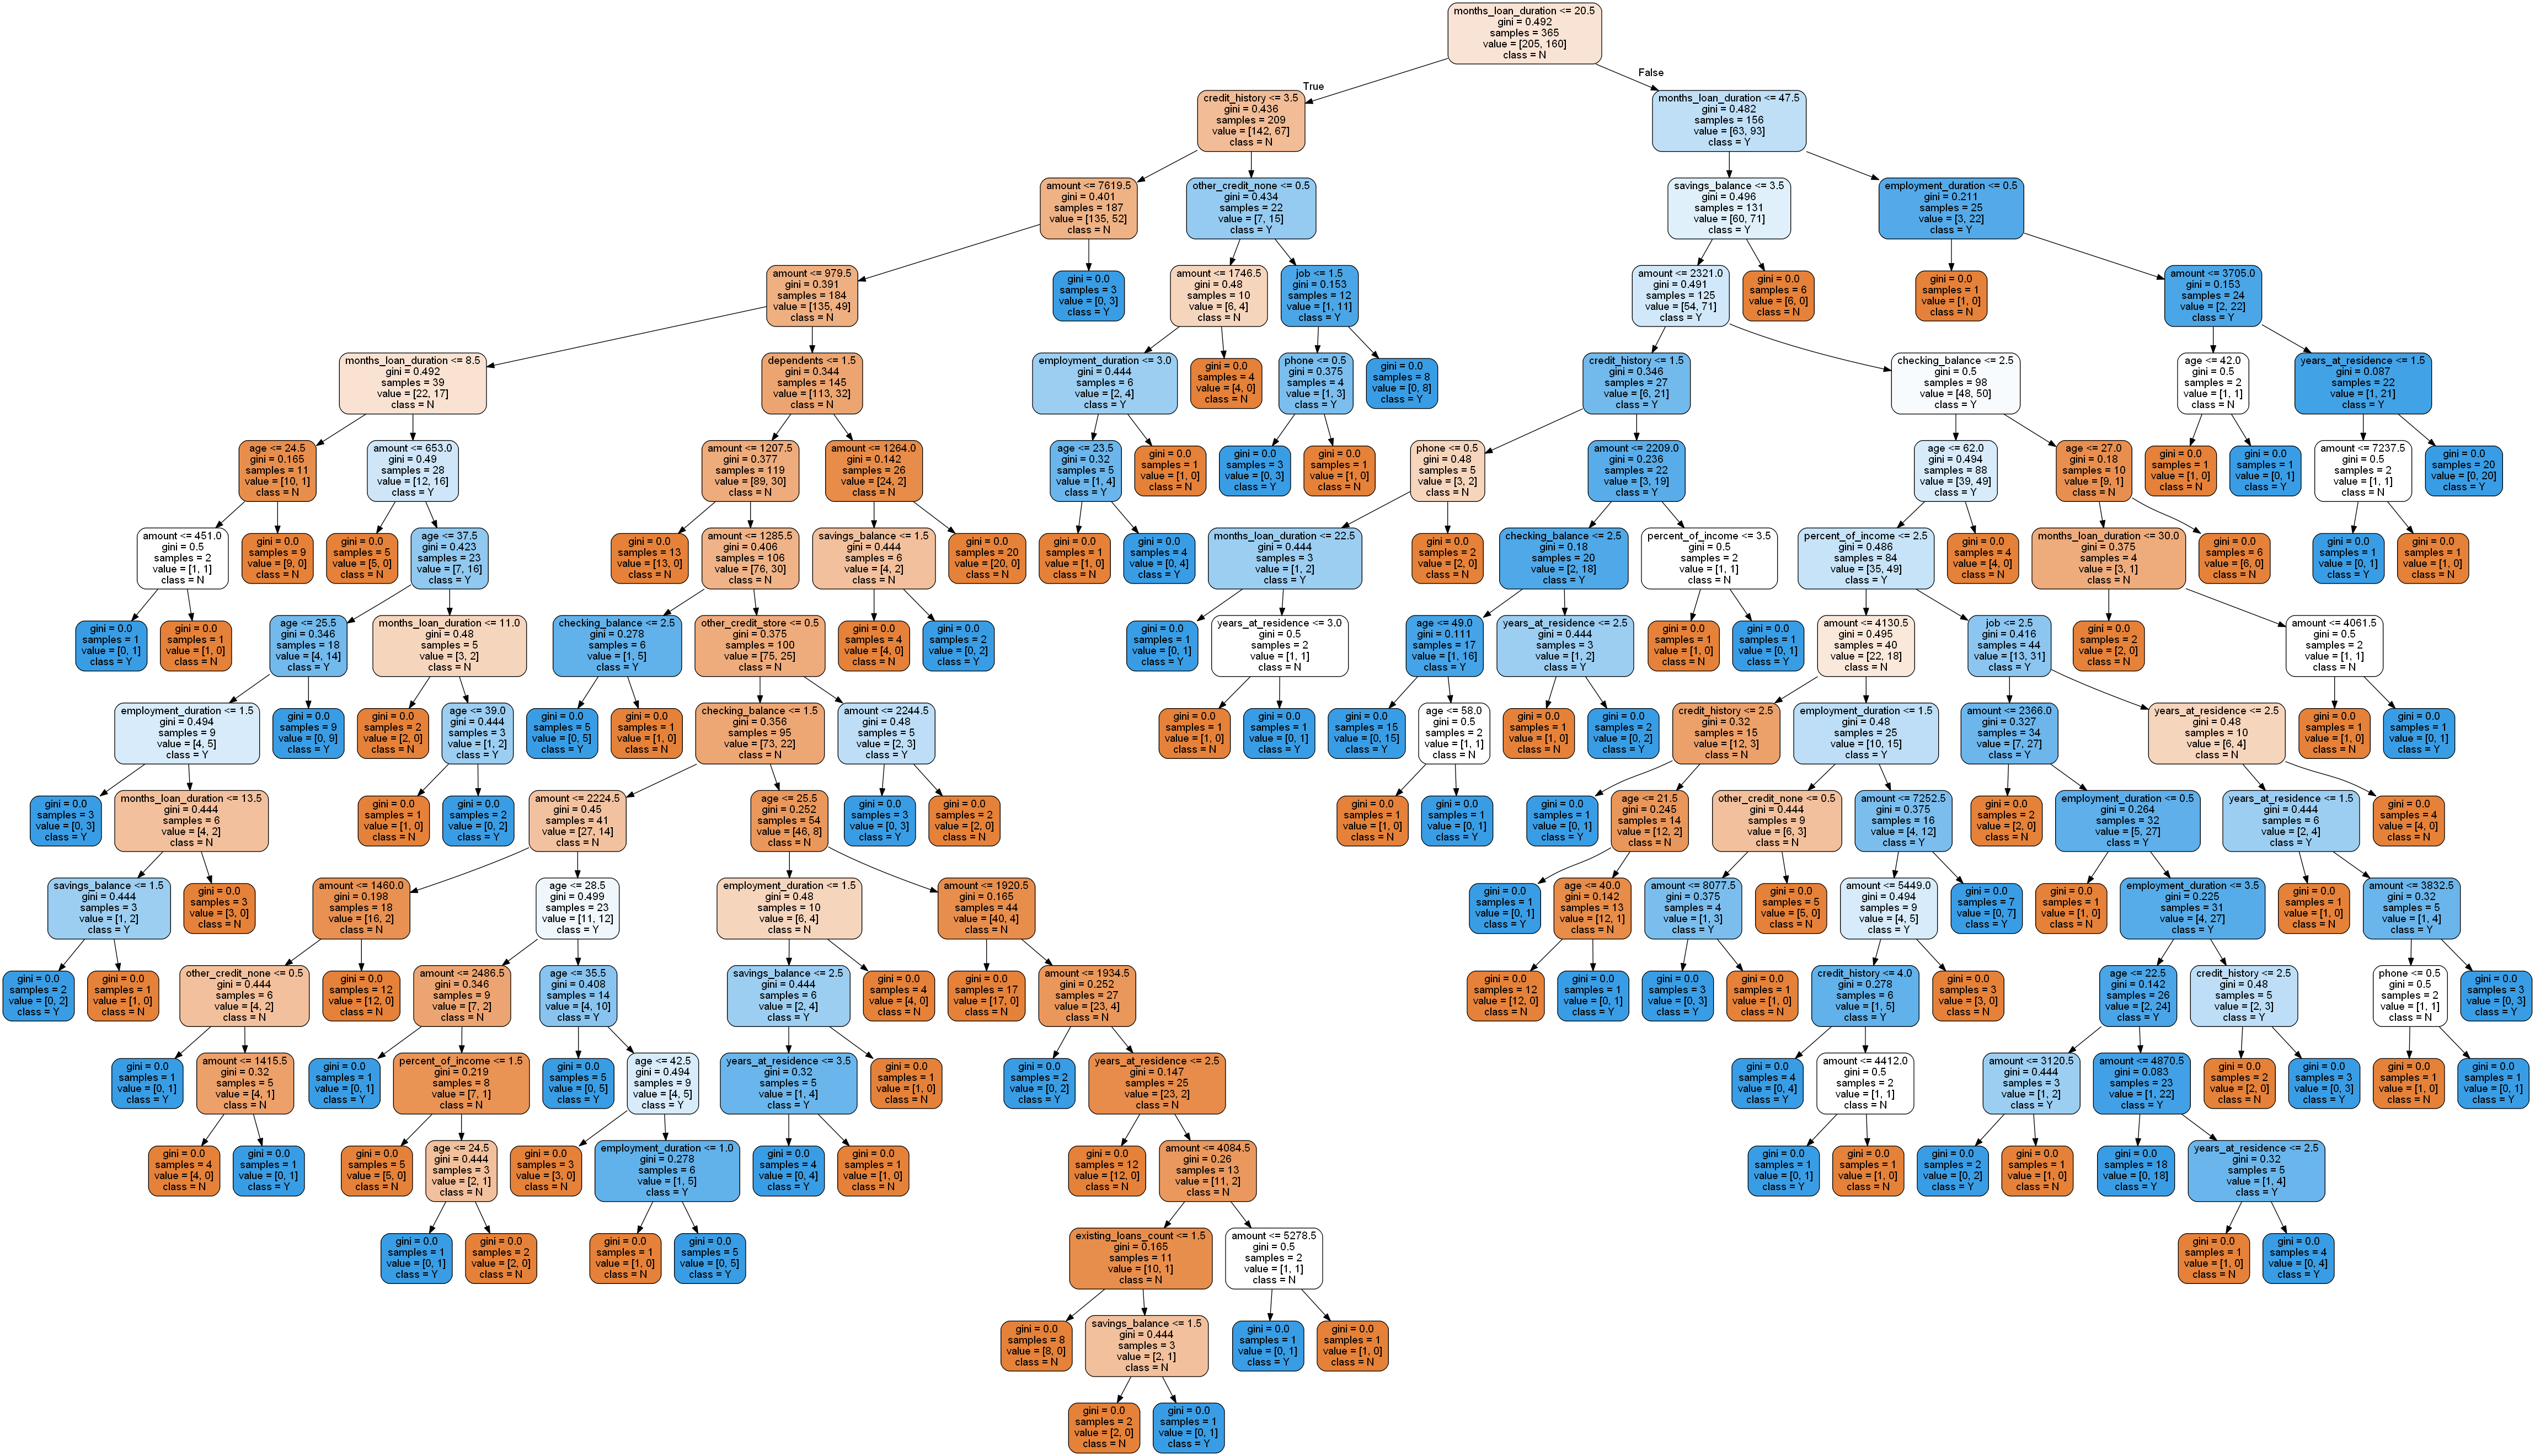

In [91]:
# retcode = subprocess.call('mkdir test2',shell=True)
# if(retcode > 0):
#     print('Error running subprocess; error code:', str(retcode))
# else:
#     print('Success; return code:', str(retcode))

retcode = subprocess.call('dot -Tpng credit_tree.dot -o credit_tree.png',shell=True)
if(retcode > 0):
    print('Error running Graphviz; error code: ', str(retcode))
else:
    display(img('credit_tree.png'))


In [97]:
dtree1 = dtc(criterion='gini', max_depth=12, random_state=600)
dtree1.fit(dfX_train,dfy_train)
print(dtree1.score(dfX_train,dfy_train))
print(dtree1.score(dfX_test,dfy_test))

0.9671232876712329
0.6942675159235668


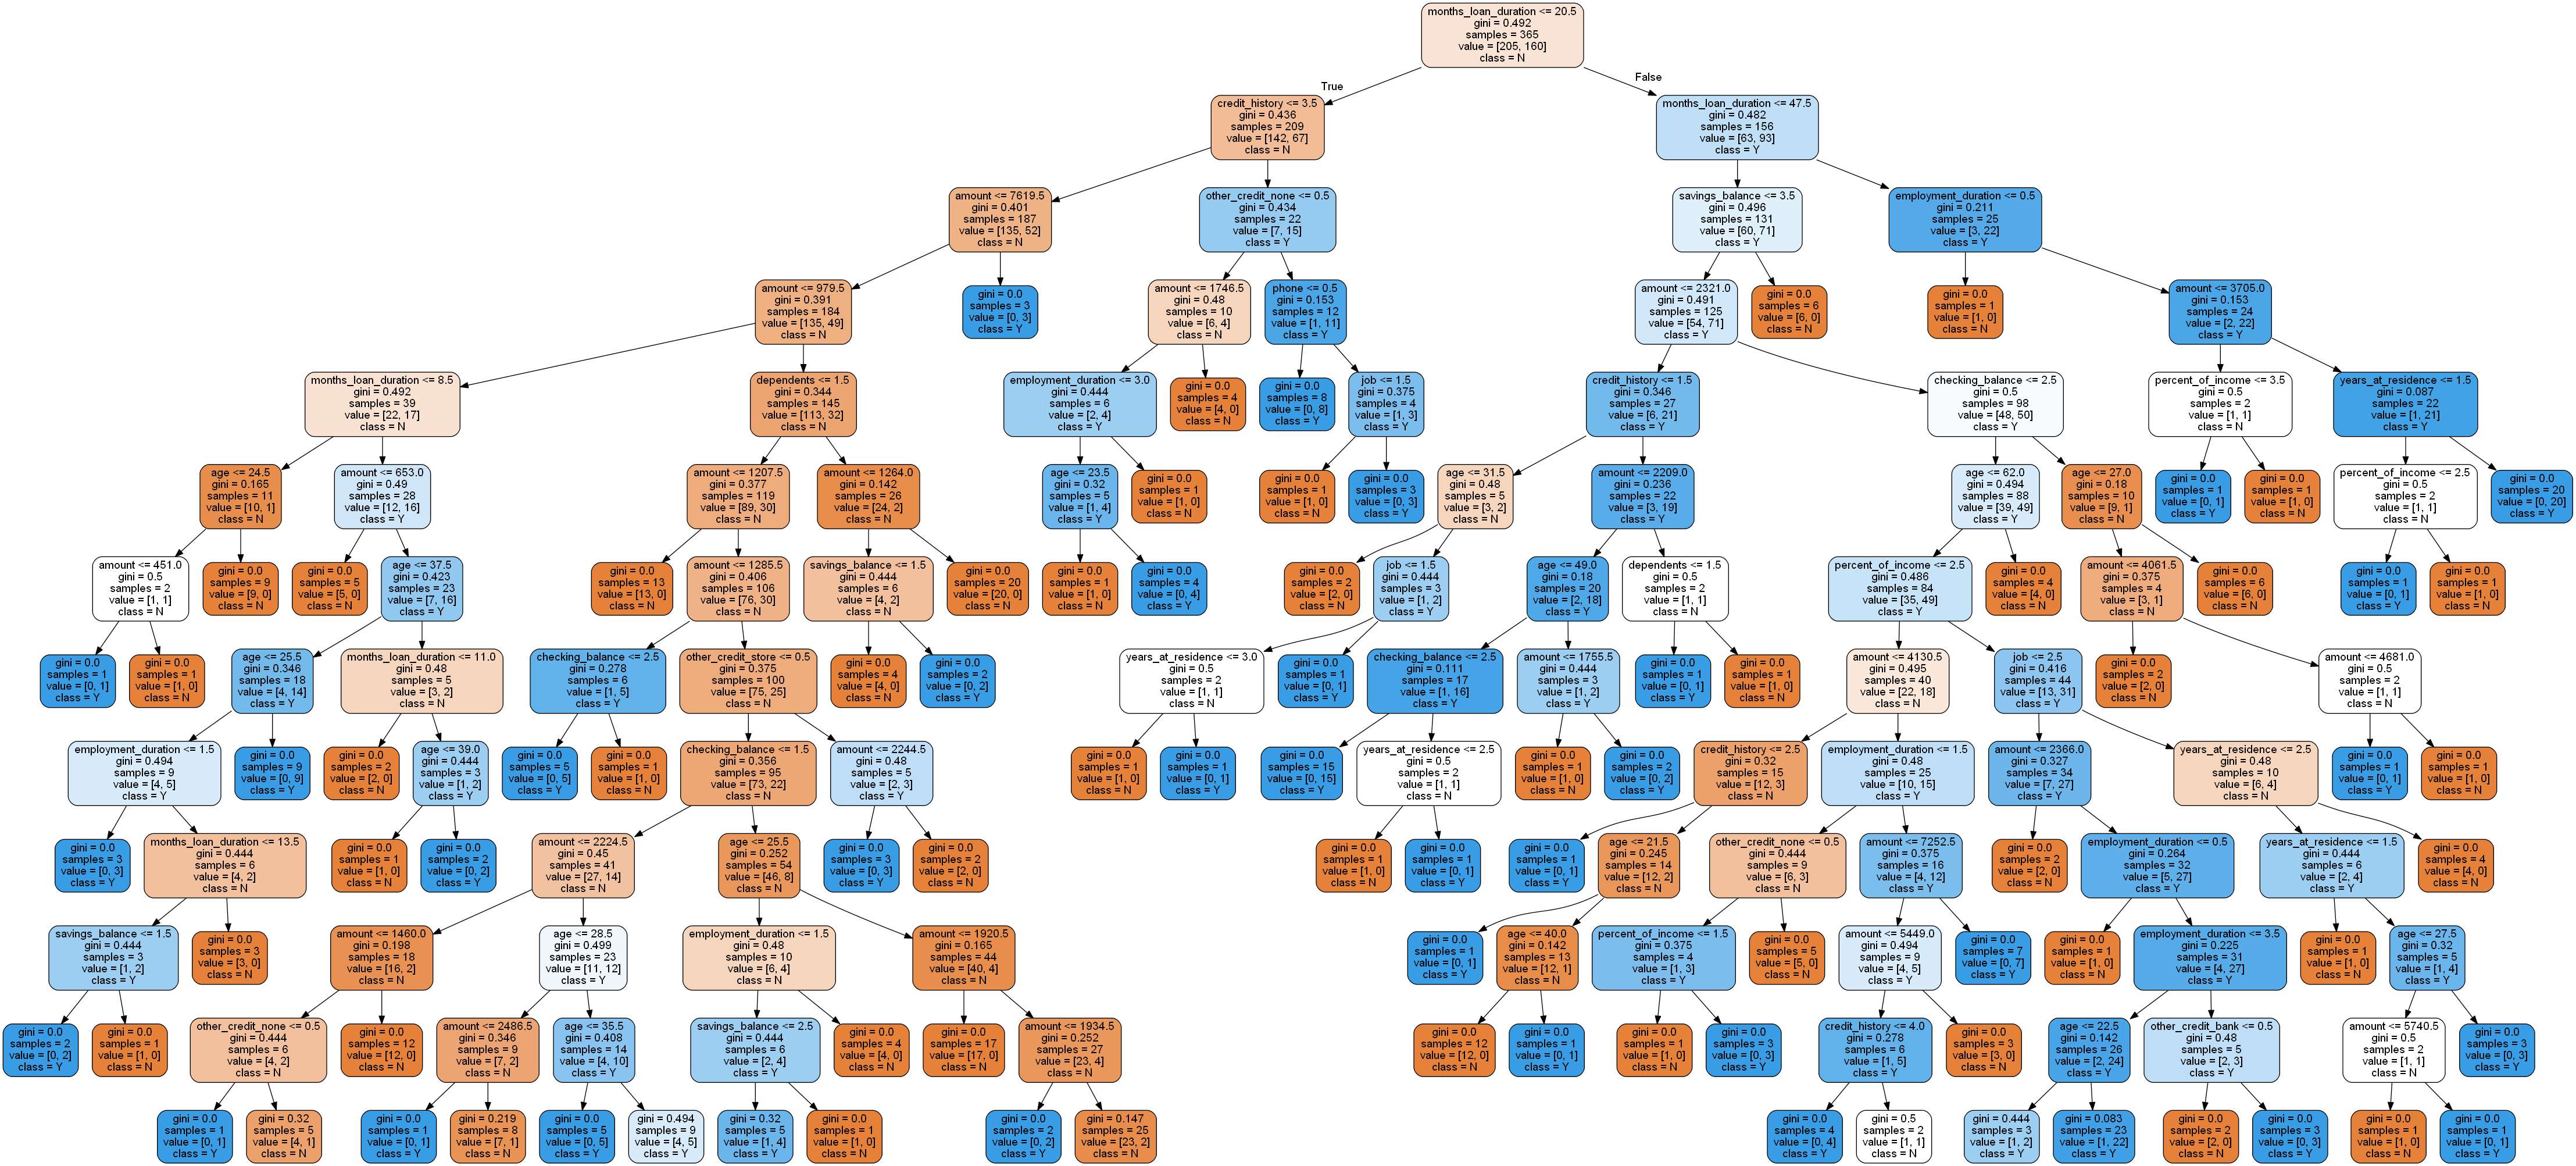

In [98]:
dtree_file1 = open('credit_tree1.dot','w')
dot_data1 = tree.export_graphviz(dtree1, out_file=dtree_file1, feature_names=list(dfX_train), class_names=list(char_labels),
                               label='all', filled=True, rounded=True )
dtree_file1.close()

retcode = subprocess.call('dot -Tpng credit_tree1.dot -o credit_tree1.png',shell=True)
if(retcode > 0):
    print('Error running Graphviz; error code: ', str(retcode))
else:
    display(img('credit_tree1.png'))


In [99]:
print(pd.DataFrame(dtree1.feature_importances_, columns=['Imp'],index=dfX_train.columns).sort_values('Imp',ascending=False))

                        Imp
amount               0.3062
months_loan_duration 0.1503
age                  0.1290
employment_duration  0.0673
credit_history       0.0628
savings_balance      0.0539
checking_balance     0.0495
other_credit_none    0.0399
percent_of_income    0.0383
years_at_residence   0.0376
job                  0.0261
other_credit_bank    0.0148
dependents           0.0142
other_credit_store   0.0079
phone                0.0021
existing_loans_count 0.0000


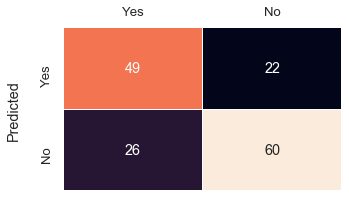

In [100]:
y_pred = dtree1.predict(dfX_test)
cmat = mtr.confusion_matrix(dfy_test,y_pred, labels=[1,0])
dfcm = pd.DataFrame(cmat, index=['Yes','No'],columns=['Yes','No'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()
